In [1]:
import numpy as np
from sigcom.tx.spm import SP1p4
import matplotlib.pyplot as plt
from sigcom.rx.util import make_noise, _max_star
from sigcom.it.spm import MI_SP1p4, Average_MI_SP1p4
from sigcom.it.rate_region import RateRegion

In [2]:
N_cells = 20000
sp1p4 = SP1p4(N_cells)
mi_sp1p4 = MI_SP1p4(sp1p4)

In [9]:
P_noise = .1
sp1p4.generate([1., 1.])
mi_sp1p4.run(P_noise)
#mi_sp1p4.print()
mi_sp1p4.rate_region.MI_sum

3.4315698827948604

In [22]:
av = Average_MI_SP1p4(N_cells)
av.run(1.2, P_noise)
av.rate_region.print()

MI0 = 2.000
MI1 = 2.000
MI0_1 = 2.000
MI1_0 = 2.000
MI_sum = 4.000


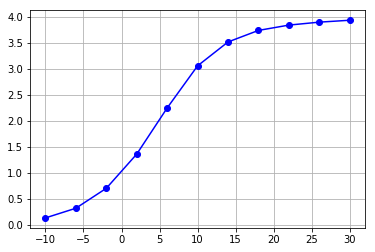

In [21]:
SNRs_dB = np.linspace(-10,30,11)
MI_sums = []
for SNR_dB in SNRs_dB:
    P_noise = 2/10**(SNR_dB/10)
    mi_sp1p4.run(P_noise)
    MI_sums.append(mi_sp1p4.rate_region.MI_sum)
plt.plot(SNRs_dB, MI_sums, 'bo-')
plt.grid();plt.show()

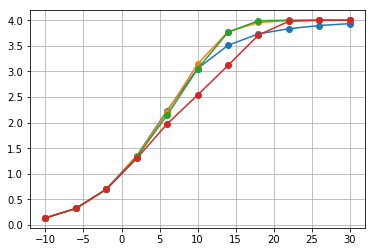

In [28]:
av = Average_MI_SP1p4(N_cells)
SNRs_dB = np.linspace(-10,30,11)
for P1p in [1.,1.5,1.7,1.9]:
    MI_sums = []
    for SNR_dB in SNRs_dB:
        P_noise = 2/10**(SNR_dB/10)
        av.run(P1p, P_noise)
        MI_sums.append(av.rate_region.MI_sum)
    plt.plot(SNRs_dB, MI_sums, 'o-')
plt.grid();plt.show()